<div style="background-color: yellow; padding: 18px;">
    <h1> Data Science Challenge |  Data & Analytics Team
</div>

<div style="background-color: lightblue; padding: 10px;">
    <h2> Case 1 - Explorar las ofertas relámpago, ¿qué insights puedes generar?
</div>

**Descripción**
 
En conjunto con el desafío te compartimos un archivo llamado `ofertas_relampago.csv` el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

[Estas ofertas](https://www.mercadolibre.com.mx/ofertas?promotion_type=lightning&container_id=MLM779363-1#origin=scut&filter_applied=promotion_type&filter_position=2&is_recommended_domain=false) en mercadolibre se pueden ver de la siguiente manera:
    
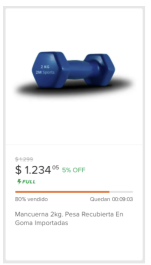

   
Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.
    
  
El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.
    
Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.
    
___

## Estratégia para a Análise Exploratória de Dados:

- Compreender o problema
- Entender os dados (carregar, verificar estrutura dos dados, tipos de variáveis, valores ausentes)
- Exploração incial (estatística descritiva básica univariada, ver distribuição de variáveis, plotar gráficos, tratar dados ausentes)
- Análise bivariada (relação entre variáveis, gráficos de dispersão e barras)
- Analisar Outliers
- Agrupar, manipular dados, gerar gráficos explicativos e tirar insights (refinar análise)
- Resumir e concluir

 ### Contexto do problema
 
 Com informações sobre os resultados de ofertas relâmpago do Meli em um período de um site, o objetivo deste desafio é realizar uma Análise Exploratória de Dados (EDA) sobre esses dados, buscando insights sobre esse tipo de oferta.
 
 Os itens (produtos) entram em promoção por um período e a ideia inicial é saber como foi a oferta, quais produtos venderam mais, quais geraram valores maiores, a que domínio e vertical pertencem.

### Entender os dados

In [145]:
# Importar bibliotecas e carregar os dados

import pandas as pd
import numpy as np
import datetime as dt


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [97]:
# Carregar o arquivo (base de dados)
df = pd.read_csv('files/ofertas_relampago.csv')

In [98]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


Entendendo um pouco sobre as variáveis disponíveis

- OFFER_START_DATE: Data de início da oferta.
- OFFER_START_DTTM: Data e hora de início da oferta.
- OFFER_FINISH_DTTM: Data e hora de finalização da oferta.
- OFFER_TYPE: Tipo de oferta.
- INVOLVED_STOCK: Estoque envolvido na oferta.
- REMAINING_STOCK_AFTER_END: Estoque restante após o término da oferta.
- SOLD_AMOUNT: Montante vendido
- SOLD_QUANTITY: Quantidade de itens vendidos.
- ORIGIN: Origem da oferta.
- SHIPPING_PAYMENT_TYPE: Tipo de pagamento de envio.
- DOM_DOMAIN_AGG1: Primeiro nível de agregação a qual o item (produto) pertence.
- VERTICAL: Vertical do produto.
- DOMAIN_ID: Domínio que o item pertence

In [99]:
# Verificando dados duplicados

df.duplicated().value_counts()

False    47820
True       926
Name: count, dtype: int64

926 dados duplicados. 926 registros iguais. Eles deverão ser eliminados

In [100]:
# Removendo dados duplicados
df.drop_duplicates(inplace=True)

In [101]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47820 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           47820 non-null  object 
 1   OFFER_START_DTTM           47820 non-null  object 
 2   OFFER_FINISH_DTTM          47820 non-null  object 
 3   OFFER_TYPE                 47820 non-null  object 
 4   INVOLVED_STOCK             47820 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  47820 non-null  int64  
 6   SOLD_AMOUNT                24548 non-null  float64
 7   SOLD_QUANTITY              24548 non-null  float64
 8   ORIGIN                     10845 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      47820 non-null  object 
 10  DOM_DOMAIN_AGG1            47820 non-null  object 
 11  VERTICAL                   47820 non-null  object 
 12  DOMAIN_ID                  47820 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 5.

Existem dados numéricos, categóricos e tipo data (que será transformado em timestamp/datetime). 

Existem dados faltantes, que irá ser explorado:

In [102]:
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  23272
SOLD_QUANTITY                23272
ORIGIN                       36975
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [103]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() /
           df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentagem'])
missing_data.head()

,Total,Porcentagem
ORIGIN,36975,0.773212
SOLD_AMOUNT,23272,0.486658
SOLD_QUANTITY,23272,0.486658
OFFER_START_DATE,0,0.000000
OFFER_START_DTTM,0,0.000000


Com 76,8% dos dados faltantes, ORIGIN é uma feature que é candidata a ser eliminada.

In [104]:
df.shape

(47820, 13)

### Exploração inicial

In [105]:
# Algumas estatísticas univariadas básicas das colunas numéricas

df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,47820.000000,47820.000000,24548.000000,24548.000000
mean,35.153095,30.641029,51.177417,10.861455
std,208.339376,197.270692,175.319125,45.502831
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.415000,3.000000
75%,15.000000,15.000000,30.882500,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


INVOLVED_STOCK e REMAINING_STOCK_AFTER_END provavelmente possuem valores atípicos pois sua média e mediana estão distantes

In [106]:
# Análise rápida para dados categóricos

df.describe(include='O')

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
count,47820,47820,47820,47820,10845,47820,47820,47820,47820
unique,61,783,7578,1,1,2,36,9,1266
top,2021-07-30,2021-07-30 13:00:00+00:00,2021-07-06 13:00:01+00:00,lightning_deal,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,1290,412,77,47820,10845,25995,6637,13065,1757


OFFER_TYPE possui apenas 1 valor (lightning_deal) e pode ser eliminada pois não agrega informação.
O ORIGIN deve ser analisado pois, apesar de possuir apenas 1 valor único, tem valores faltantes e talvez possa ser uma categoria a mais.

In [107]:
# Todas as ofertas foram do tipo lightning_deal

df.drop(columns=['OFFER_TYPE'], inplace=True)

**Olhando as datas**

In [108]:
print(f'As ofertas aconteceram de {df.OFFER_START_DATE.min()} a {df.OFFER_START_DATE.max()}')

As ofertas aconteceram de 2021-06-01 a 2021-07-31


In [109]:
df = df.reset_index(drop=True)

In [110]:
# Transformando as colunas de data em datetime

for coluna_data in ['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']:
    df[coluna_data] = pd.to_datetime(df[coluna_data])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47820 entries, 0 to 47819
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           47820 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           47820 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          47820 non-null  datetime64[ns, UTC]
 3   INVOLVED_STOCK             47820 non-null  int64              
 4   REMAINING_STOCK_AFTER_END  47820 non-null  int64              
 5   SOLD_AMOUNT                24548 non-null  float64            
 6   SOLD_QUANTITY              24548 non-null  float64            
 7   ORIGIN                     10845 non-null  object             
 8   SHIPPING_PAYMENT_TYPE      47820 non-null  object             
 9   DOM_DOMAIN_AGG1            47820 non-null  object             
 10  VERTICAL                   47820 non-null  object             
 11  DO

In [112]:
# Criar a coluna de duração da oferta:

df['OFFER_DURATION'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
df['OFFER_DURATION_HOURS'] = (df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600

In [113]:
# Em média a oferta dura quase 6 horas
df['OFFER_DURATION_HOURS'].mean()

5.702295605046701

In [114]:
df['OFFER_DURATION_HOURS'].median()

6.000555555555556

In [115]:
# Existem durações de 4 dias (104 horas) mas existem durações instantâneas (o que não é possível) - investigar

df['OFFER_DURATION_HOURS'].sort_values()

34439      0.000000
4941       0.000000
33645      0.000000
44774      0.000000
33613      0.000000
            ...    
27955     14.619722
27975     14.629722
27991     14.668611
28075     15.619167
41224    104.752500
Name: OFFER_DURATION_HOURS, Length: 47820, dtype: float64

Existem durações de 4 dias (104 horas) mas existem durações instantâneas (o que não é possível) - investigar

**Features**

In [116]:
# Feature origin:

df.ORIGIN.value_counts(dropna=False)

ORIGIN
NaN    36975
A      10845
Name: count, dtype: int64

In [117]:
df.ORIGIN.value_counts(dropna=False, normalize=True)

ORIGIN
NaN    0.773212
A      0.226788
Name: proportion, dtype: float64

A origem da oferta não parece trazer informação isoladamente. Essa feature será retirada do conjunto de dados

In [118]:
df.drop(columns=['ORIGIN'], inplace=True)

In [119]:
# SHIPPING_PAYMENT_TYPE: tipo do pagamento de envio

df.SHIPPING_PAYMENT_TYPE.value_counts(dropna=False)

SHIPPING_PAYMENT_TYPE
free_shipping    25995
none             21825
Name: count, dtype: int64

In [120]:
df.SHIPPING_PAYMENT_TYPE.value_counts(dropna=False, normalize=True)

SHIPPING_PAYMENT_TYPE
free_shipping    0.543601
none             0.456399
Name: proportion, dtype: float64

Como 54% das ofertas tiveram envio gratuito (free_shipping), imagina-se que os demais tiveram um valor de frete, ou seja, não foram sem custo. Por isso, pode-se substituir 'none' pela categoria `paid_shipping`

In [121]:
df['SHIPPING_PAYMENT_TYPE'] = df['SHIPPING_PAYMENT_TYPE'].str.replace('none','paid_shipping')

# Se for fazer feature engineering, talvez seja melhor fazer um encoding (OHE), aí free_shipping fica 1 e o restante como 0

**Domínios (categorias dos produtos)**

In [122]:
# Top 10 ofertas de domínio no período de 2 meses

df['DOM_DOMAIN_AGG1'].value_counts(dropna=False, normalize=True).head(10)

DOM_DOMAIN_AGG1
HOME&DECOR            0.138791
APPAREL ACCESORIES    0.090234
APPAREL               0.079757
COMPUTERS             0.076558
SPORTS                0.068235
PHARMACEUTICS         0.063028
PERSONAL CARE         0.061899
ELECTRONICS           0.061104
MOBILE                0.037432
AUTOPARTS             0.035362
Name: proportion, dtype: float64

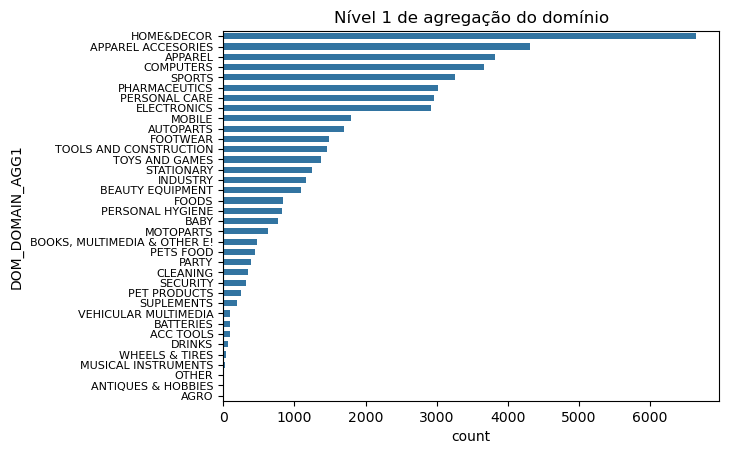

In [123]:
sns.barplot(df['DOM_DOMAIN_AGG1'].value_counts(normalize=False), orient= "h", width=0.6)
plt.title('Nível 1 de agregação do domínio')
plt.yticks(fontsize=8)
plt.show()

In [124]:
# Olhando para a vertical a que o produto pertence

df['VERTICAL'].value_counts(dropna=False, normalize=True)

VERTICAL
APP & SPORTS       0.273212
HOME & INDUSTRY    0.226307
CE                 0.175094
BEAUTY & HEALTH    0.147804
CPG                0.055019
ACC                0.053388
T & B              0.052990
ENTERTAINMENT      0.010414
OTHERS             0.005772
Name: proportion, dtype: float64

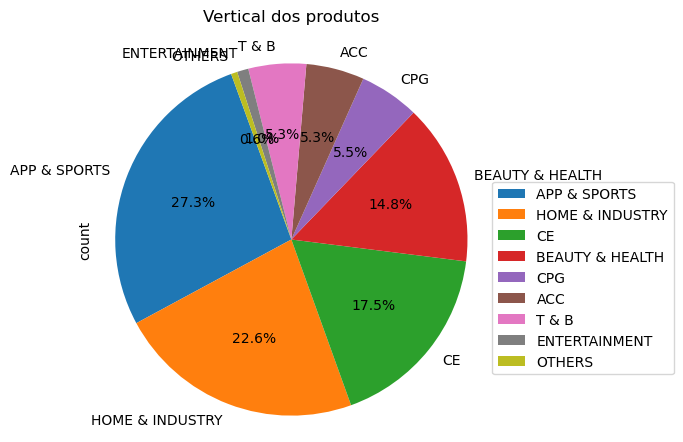

In [125]:
df['VERTICAL'].value_counts(dropna=False).plot.pie(figsize=(5, 5), autopct='%1.1f%%', startangle=110)
plt.legend(bbox_to_anchor=(1, 0.4), loc="center left")
plt.axis('equal')
plt.rcParams.update({'font.size': 10})
plt.yticks([])
plt.title('Vertical dos produtos\n')
plt.show()

O gráfico de setores (pizza) não é a melhor forma de ver quando se tem várias categorias mas aqui percebemos que quase 70% das ofertas foram das verticais: APP & SPORTS, HOME & INDUSTRY e CE. Nesse caso também não seja tão relevante a análise univariada.

In [126]:
df['DOMAIN_ID'].value_counts(dropna=False)

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1757
MLM-HEADPHONES                        750
MLM-LED_STRIPS                        512
MLM-SUNGLASSES                        455
MLM-VEHICLE_LED_BULBS                 454
                                     ... 
MLM-DRILL_CHUCKS                        1
MLM-DINING_TABLES                       1
MLM-TOY_DRUMS                           1
MLM-PARTY_SUPPLY_KITS                   1
MLM-ELECTRIC_SANDWICH_MAKERS            1
Name: count, Length: 1266, dtype: int64

In [127]:
# separando o site do domínio. Como são todos dados do México, usei apenas o domínio
df['DOMAIN_ID'] = df['DOMAIN_ID'].str.split("-", expand=True)[1]

In [128]:
# Apesar de 1266 categorias (muitas), podemos usar o domínio para fazer uma análise bivariada 
df['DOMAIN_ID'].value_counts(dropna=False, normalize=True)

DOMAIN_ID
SURGICAL_AND_INDUSTRIAL_MASKS    0.036742
HEADPHONES                       0.015684
LED_STRIPS                       0.010707
SUNGLASSES                       0.009515
VEHICLE_LED_BULBS                0.009494
                                   ...   
DRILL_CHUCKS                     0.000021
DINING_TABLES                    0.000021
TOY_DRUMS                        0.000021
PARTY_SUPPLY_KITS                0.000021
ELECTRIC_SANDWICH_MAKERS         0.000021
Name: proportion, Length: 1266, dtype: float64

**Análise univariada das features numéricas**

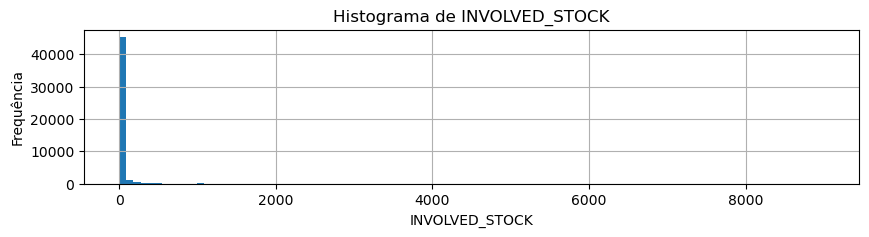

In [129]:
# distribuição dos dados com histograma.
df.INVOLVED_STOCK.hist(bins=100, figsize=(10,2))
plt.xlabel('INVOLVED_STOCK')
plt.ylabel('Frequência')
plt.title('Histograma de INVOLVED_STOCK')
plt.show()

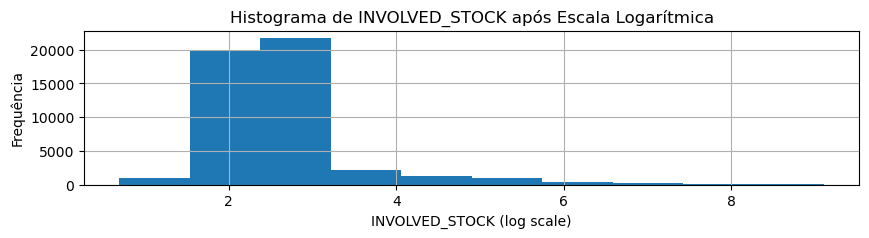

In [130]:
# Aplicando a escala logaritmica aos dados para melhorar a visualização
df['INVOLVED_STOCK_log'] = np.log1p(df['INVOLVED_STOCK'])
df['INVOLVED_STOCK_log'].hist(figsize=(10,2))
plt.xlabel('INVOLVED_STOCK (log scale)')
plt.ylabel('Frequência')
plt.title('Histograma de INVOLVED_STOCK após Escala Logarítmica')
plt.show()

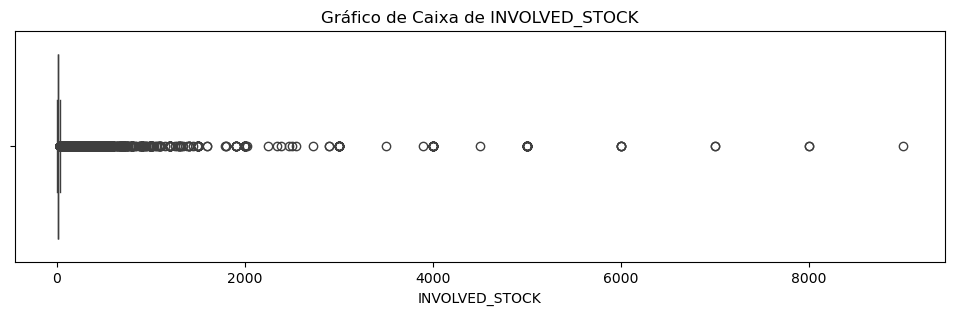

In [131]:
# Existem vários valores atípicos. Não faz sentido tirar ou tratar.
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['INVOLVED_STOCK'])
plt.xlabel('INVOLVED_STOCK')
plt.title('Gráfico de Caixa de INVOLVED_STOCK')
plt.show()

In [132]:
# total de registros nulos
df[['SOLD_AMOUNT', 'SOLD_QUANTITY']].isna().sum()

SOLD_AMOUNT      23272
SOLD_QUANTITY    23272
dtype: int64

In [133]:
# Entende-se que os valores nulos de SOLD_QUANTITY são devido a não ter a venda, por isso, pode-se substituir por zero.
# Pode verificar pela quantidade de estoque que não se alterou nesses casos

df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)

# Com o mesmo raciocínio, o montante vendido também é zero

df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)

In [134]:
# Estoque negativo
df[df['REMAINING_STOCK_AFTER_END'] < 0] #1263 registros

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_HOURS,INVOLVED_STOCK_log
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,paid_shipping,PETS FOOD,CPG,BIRD_FOODS,0 days 07:02:43,7.045278,1.609438
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,10,-1,103.03,11.0,free_shipping,COMPUTERS,CE,HEADPHONES,0 days 04:05:39,4.094167,2.397895
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,10,-1,0.00,0.0,free_shipping,COMPUTERS,CE,HEADPHONES,0 days 04:05:32,4.092222,2.397895
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,5,-4,12.18,9.0,paid_shipping,HOME&DECOR,HOME & INDUSTRY,SOAP_AND_DETERGENT_DISPENSERS,0 days 01:20:21,1.339167,1.791759
76,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,8,-1,12.61,9.0,paid_shipping,PETS FOOD,CPG,CATS_AND_DOGS_FOODS,0 days 02:42:19,2.705278,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47708,2021-06-19,2021-06-19 14:00:00+00:00,2021-06-19 20:31:47+00:00,10,-2,110.18,12.0,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,INFRARED_THERMOMETERS,0 days 06:31:47,6.529722,2.397895
47745,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 00:54:55+00:00,15,-1,29.50,16.0,paid_shipping,HOME&DECOR,HOME & INDUSTRY,LED_STRIPS,0 days 05:54:55,5.915278,2.772589
47757,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 12:27:40+00:00,5,-1,6.38,6.0,paid_shipping,APPAREL,APP & SPORTS,SOCKS,0 days 05:27:40,5.461111,1.791759
47786,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 00:36:10+00:00,5,-1,8.77,6.0,paid_shipping,AUTOPARTS,ACC,VEHICLE_ACCESSORIES,0 days 05:36:10,5.602778,1.791759


In [135]:
df[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY']]

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
0,4,-2,4.72,6.0
1,5,5,0.00,0.0
2,15,12,10.73,3.0
3,15,13,7.03,2.0
4,15,0,39.65,15.0
...,...,...,...,...
47815,15,9,16.28,6.0
47816,5,5,0.00,0.0
47817,5,3,16.62,2.0
47818,5,1,38.79,4.0


In [57]:
# Estoque negativo
df[df['REMAINING_STOCK_AFTER_END'] < 0] #1263 registros

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_HOURS,INVOLVED_STOCK_log
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,4,-2,4.72,6.0,paid_shipping,PETS FOOD,CPG,BIRD_FOODS,0 days 07:02:43,7.045278,1.609438
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,10,-1,103.03,11.0,free_shipping,COMPUTERS,CE,HEADPHONES,0 days 04:05:39,4.094167,2.397895
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,10,-1,0.00,0.0,free_shipping,COMPUTERS,CE,HEADPHONES,0 days 04:05:32,4.092222,2.397895
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,5,-4,12.18,9.0,paid_shipping,HOME&DECOR,HOME & INDUSTRY,SOAP_AND_DETERGENT_DISPENSERS,0 days 01:20:21,1.339167,1.791759
76,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,8,-1,12.61,9.0,paid_shipping,PETS FOOD,CPG,CATS_AND_DOGS_FOODS,0 days 02:42:19,2.705278,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47708,2021-06-19,2021-06-19 14:00:00+00:00,2021-06-19 20:31:47+00:00,10,-2,110.18,12.0,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,INFRARED_THERMOMETERS,0 days 06:31:47,6.529722,2.397895
47745,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 00:54:55+00:00,15,-1,29.50,16.0,paid_shipping,HOME&DECOR,HOME & INDUSTRY,LED_STRIPS,0 days 05:54:55,5.915278,2.772589
47757,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 12:27:40+00:00,5,-1,6.38,6.0,paid_shipping,APPAREL,APP & SPORTS,SOCKS,0 days 05:27:40,5.461111,1.791759
47786,2021-06-19,2021-06-19 19:00:00+00:00,2021-06-20 00:36:10+00:00,5,-1,8.77,6.0,paid_shipping,AUTOPARTS,ACC,VEHICLE_ACCESSORIES,0 days 05:36:10,5.602778,1.791759


### Relação entre as variáveis

Analisar a quantidade e o valor vendido ao longo do tempo

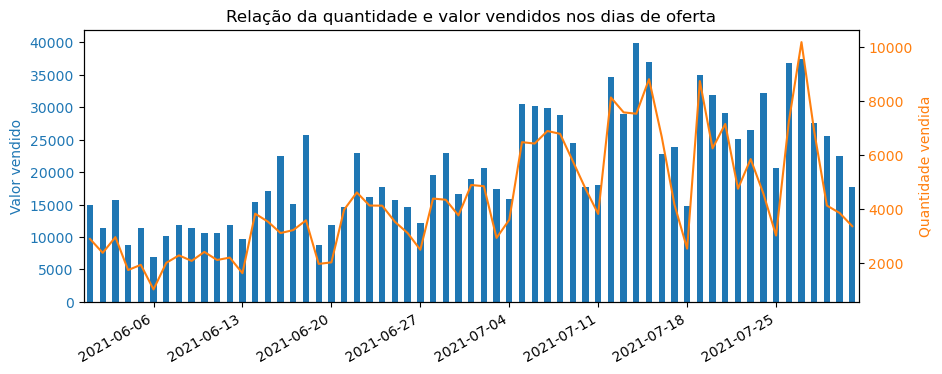

In [187]:
fig, ax1 = plt.subplots(figsize=(16,5))

color = 'tab:blue'
ax1.set_ylabel('Valor vendido', color=color)
ax1 = df.groupby(['OFFER_START_DATE'])['SOLD_AMOUNT'].sum().plot.bar(figsize=(10, 4), color = color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('') 
# ax1.xaxis.grid(True, which='major')
# ax1.yaxis.grid(True, which='major')

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Quantidade vendida', color=color) 
ax2 = df.groupby(['OFFER_START_DATE'])['SOLD_QUANTITY'].sum().plot(figsize=(10, 4), color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.title('Relação da quantidade e valor vendidos nos dias de oferta')
plt.show()

Adicionando essa relação com a vertical do produto

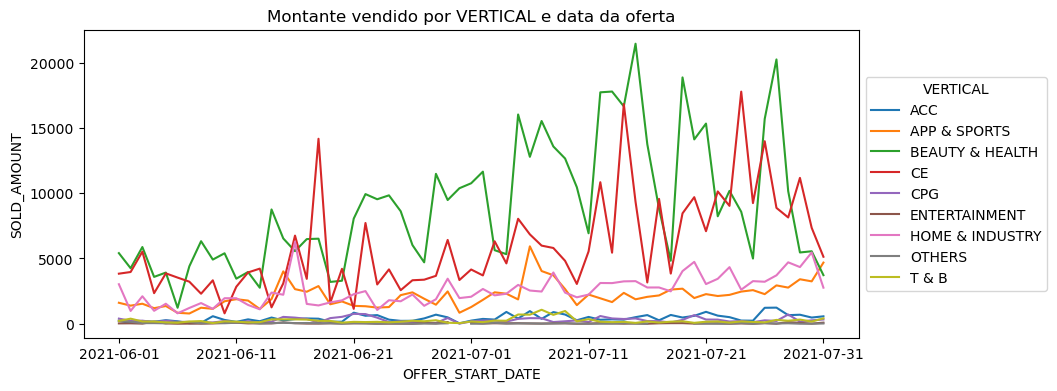

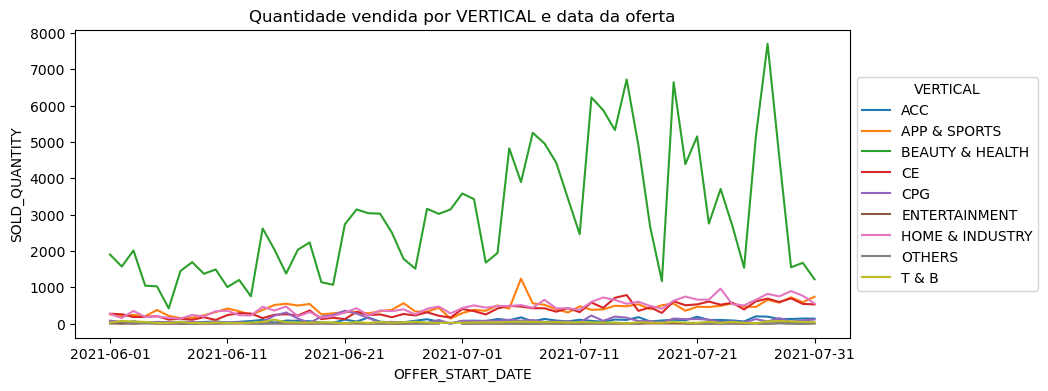

In [188]:
ax = df.groupby(['VERTICAL', 'OFFER_START_DATE'])['SOLD_AMOUNT'].sum().unstack(0).plot(figsize=(10, 4))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='VERTICAL')
plt.xlabel('OFFER_START_DATE')
plt.ylabel('SOLD_AMOUNT')
plt.title('Montante vendido por VERTICAL e data da oferta')
plt.show()

ax = df.groupby(['VERTICAL', 'OFFER_START_DATE'])['SOLD_QUANTITY'].sum().unstack(0).plot(figsize=(10, 4))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='VERTICAL')
plt.xlabel('OFFER_START_DATE')
plt.ylabel('SOLD_QUANTITY')
plt.title('Quantidade vendida por VERTICAL e data da oferta')
plt.show()

Percebe-se que a vertical de beleza e saúde teve a maior quantidade vendida nesses 2 meses assim como o maior valor vendido também. A vertical CE, computador e eletrônicos teve um valor vendido expressivo apesar da quantidade baixa. Produtos dessa vertical são mais caros.

In [141]:
df.groupby(['VERTICAL', 'OFFER_START_DATE'])['SOLD_AMOUNT'].sum().unstack(0)

VERTICAL,ACC,APP & SPORTS,BEAUTY & HEALTH,CE,CPG,ENTERTAINMENT,HOME & INDUSTRY,OTHERS,T & B
OFFER_START_DATE,,,,,,,,,
2021-06-01,220.00,1604.70,5406.73,3833.60,389.55,24.00,3026.12,223.47,215.81
2021-06-02,62.56,1385.26,4251.56,3961.53,221.17,30.08,978.14,152.00,386.46
2021-06-03,208.37,1532.00,5874.64,5520.21,231.87,8.95,2103.22,43.80,172.92
2021-06-04,151.14,1191.05,3587.89,2341.11,127.93,164.93,989.84,45.00,166.59
2021-06-05,271.28,1355.50,3917.72,3857.79,230.25,23.19,1531.03,29.93,105.47
...,...,...,...,...,...,...,...,...,...
2021-07-27,1232.28,2936.14,20243.81,8872.83,212.32,0.00,3707.36,15.65,291.76
2021-07-28,655.57,2766.78,10154.86,8139.45,706.49,126.45,4703.62,30.35,227.41
2021-07-29,689.25,3406.60,5457.75,11170.76,162.57,69.80,4339.42,0.00,318.15


In [72]:
dfa = df[df['DOMAIN_ID']=='WINES'].sort_values('OFFER_START_DTTM').set_index('OFFER_START_DATE')

In [79]:
dfa[['INVOLVED_STOCK','REMAINING_STOCK_AFTER_END']]#.plot()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END
OFFER_START_DATE,,
2021-06-26,5,5
2021-06-26,5,5
2021-06-29,15,-3
2021-07-02,15,2
2021-07-03,12,8
2021-07-03,15,15
2021-07-03,15,15
2021-07-03,15,14
2021-07-03,5,0


In [ ]:
'SOLD_AMOUNT','SOLD_QUANTITY

In [80]:
df[df['DOMAIN_ID']=='WINES'].sort_values('OFFER_START_DTTM')

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_HOURS,INVOLVED_STOCK_log
3371,2021-06-26,2021-06-26 07:00:00+00:00,2021-06-26 13:00:04+00:00,5,5,0.00,0.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:04,6.001111,1.791759
3372,2021-06-26,2021-06-26 19:00:00+00:00,2021-06-27 01:00:02+00:00,5,5,0.00,0.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:02,6.000556,1.791759
43433,2021-06-29,2021-06-29 19:00:00+00:00,2021-06-29 20:40:00+00:00,15,-3,13.87,18.0,paid_shipping,DRINKS,CPG,WINES,0 days 01:40:00,1.666667,2.772589
41616,2021-07-02,2021-07-02 19:00:00+00:00,2021-07-03 01:00:03+00:00,15,2,17.96,13.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:03,6.000833,2.772589
6759,2021-07-03,2021-07-03 07:00:00+00:00,2021-07-03 13:00:02+00:00,12,8,7.02,4.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:02,6.000556,2.564949
6761,2021-07-03,2021-07-03 07:00:00+00:00,2021-07-03 13:00:02+00:00,15,15,0.00,0.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:02,6.000556,2.772589
6760,2021-07-03,2021-07-03 13:00:00+00:00,2021-07-03 19:00:34+00:00,15,15,0.00,0.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:34,6.009444,2.772589
6762,2021-07-03,2021-07-03 13:00:00+00:00,2021-07-03 19:00:04+00:00,15,14,1.83,1.0,paid_shipping,DRINKS,CPG,WINES,0 days 06:00:04,6.001111,2.772589
6763,2021-07-03,2021-07-03 19:00:00+00:00,2021-07-03 23:15:32+00:00,5,0,6.64,4.0,paid_shipping,DRINKS,CPG,WINES,0 days 04:15:32,4.258889,1.791759
18317,2021-07-04,2021-07-04 07:00:00+00:00,2021-07-04 13:00:04+00:00,5,5,0.00,0.0,free_shipping,DRINKS,CPG,WINES,0 days 06:00:04,6.001111,1.791759
